In [ ]:
# datasource - https://archive.ics.uci.edu/dataset/19/car+evaluation
# dataset - https://drive.google.com/file/d/1NTj6gDj_Sx0Rm34-ejr-evD11QroCFZY/view?usp=drive_link

In [58]:
# Auto EDA library
! pip install ydata_profiling

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import profile_report

# sklearn libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# data import
car_data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/car_evaluation.csv', header=None)

# data dimension
car_data.shape

(1728, 7)

In [7]:
# data sample
car_data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
# mapping column names as per data dictionary
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data.columns = col_names

# data sample
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
# Quick EDA
car_data.profile_report(title='Report', progress_bar=False)

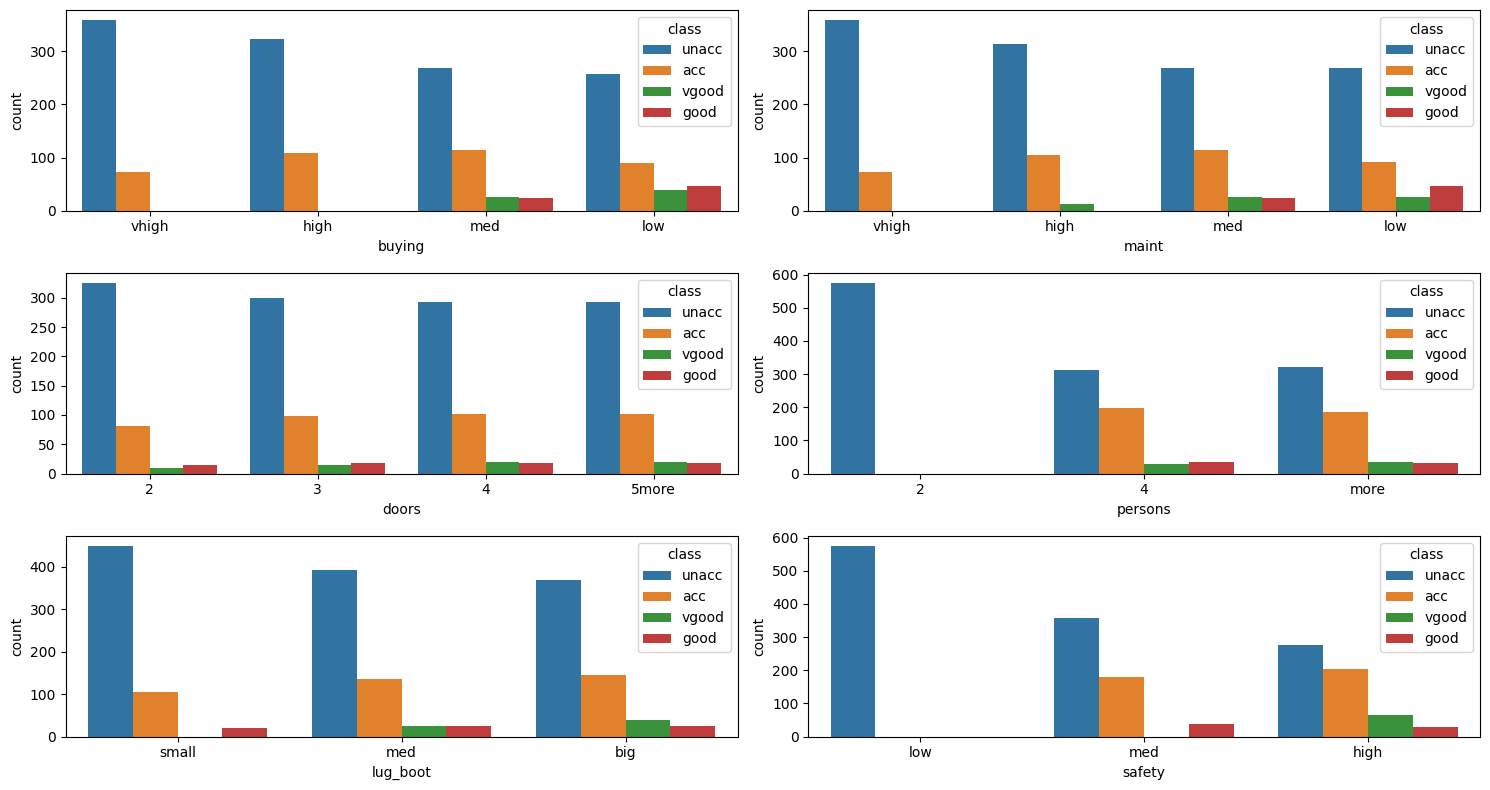

In [15]:
# Understanding the categorical columns
plt.figure(figsize=(15,8))
cntr = 1
for cols in car_data.columns:
    if cols != 'class':
        plt.subplot(3,2, cntr)
        sns.countplot(data=car_data, x=cols, hue='class')
        cntr += 1
plt.tight_layout()

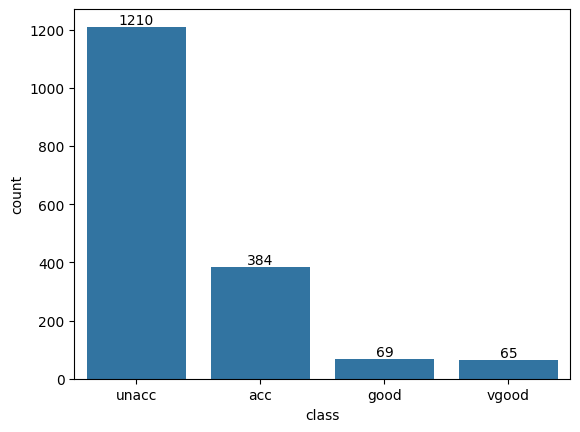

In [19]:
# Target column analysis
ax=sns.countplot(car_data, x='class', order=car_data['class'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [32]:
# Handling the categorical variables

# dependency split
x = car_data.drop('class', axis=1)
y = car_data['class']

# Label enconding
encoder = LabelEncoder()
for cols in x:
    x[cols] = encoder.fit_transform(x[cols])

# sample after encoding
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [56]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# feature scaling
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

Training Accuracy: 97.18 %
Testing Accuracy: 95.38 %

Classification Report:

               precision    recall  f1-score   support

         acc       0.86      0.97      0.91        77
        good       0.73      0.57      0.64        14
       unacc       1.00      0.98      0.99       242
       vgood       1.00      0.69      0.82        13

    accuracy                           0.95       346
   macro avg       0.90      0.81      0.84       346
weighted avg       0.96      0.95      0.95       346



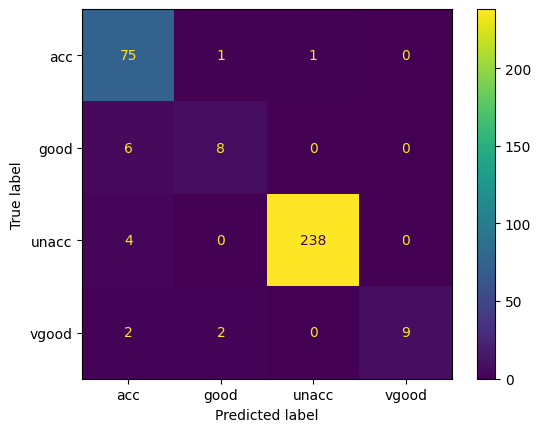

In [76]:
# Decision Tree
dtclassifer = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)
dtclassifer.fit(x_train_scaled, y_train)
dt_train_score = round(dtclassifer.score(x_train_scaled, y_train)*100, 2)
print('Training Accuracy:',dt_train_score , '%')

# model prediction
y_pred_dt = dtclassifer.predict(x_test_scaled)
dt_test_score = round(accuracy_score(y_test, y_pred_dt)*100,2)
print('Testing Accuracy:', dt_test_score, '%')

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
print('\nClassification Report:\n\n', classification_report(y_test, y_pred_dt))

Training Accuracy: 84.59 %
Testing Accuracy: 85.26 %

Classification Report:

               precision    recall  f1-score   support

         acc       0.60      1.00      0.75        77
        good       0.00      0.00      0.00        14
       unacc       1.00      0.90      0.95       242
       vgood       0.00      0.00      0.00        13

    accuracy                           0.85       346
   macro avg       0.40      0.48      0.42       346
weighted avg       0.83      0.85      0.83       346



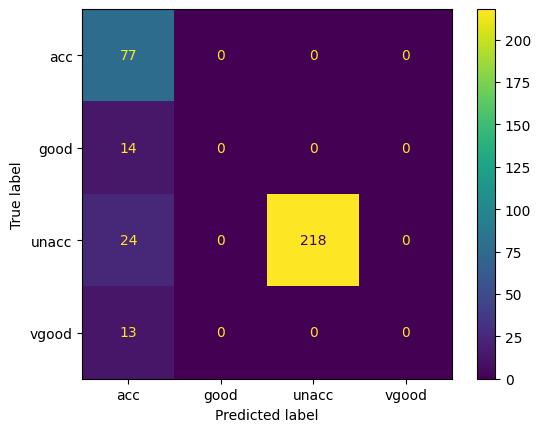

In [78]:
# Adaboost
abclassifer = AdaBoostClassifier(random_state=42)
abclassifer.fit(x_train_scaled, y_train)
ab_train_score = round(abclassifer.score(x_train_scaled, y_train)*100, 2)
print('Training Accuracy:',ab_train_score , '%')

# model prediction
y_pred_ab = abclassifer.predict(x_test_scaled)
ab_test_score = round(accuracy_score(y_test, y_pred_ab)*100,2)
print('Testing Accuracy:', ab_test_score, '%')

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ab)
print('\nClassification Report:\n\n', classification_report(y_test, y_pred_ab))

Training Accuracy: 100.0 %
Testing Accuracy: 98.27 %

Classification Report:

               precision    recall  f1-score   support

         acc       0.96      0.96      0.96        77
        good       0.93      0.93      0.93        14
       unacc       0.99      1.00      0.99       242
       vgood       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



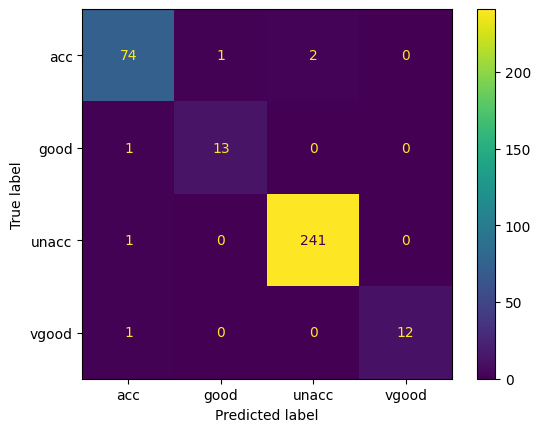

In [79]:
# Random Forest
rfclassifer = RandomForestClassifier(n_estimators=101, criterion='entropy', random_state=42)
rfclassifer.fit(x_train_scaled, y_train)
rf_train_score = round(rfclassifer.score(x_train_scaled, y_train)*100, 2)
print('Training Accuracy:',rf_train_score , '%')

# model prediction
y_pred_rf = rfclassifer.predict(x_test_scaled)
rf_test_score = round(accuracy_score(y_test, y_pred_rf)*100,2)
print('Testing Accuracy:', rf_test_score, '%')

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print('\nClassification Report:\n\n', classification_report(y_test, y_pred_rf))

In [71]:
# Feature Importance
feature_importance = pd.Series(np.round(rfclassifer.feature_importances_*100, 2), index=x.columns).sort_values(ascending=False)
feature_importance

,0
safety,27.81
persons,22.81
buying,17.98
maint,15.89
lug_boot,9.36
doors,6.15


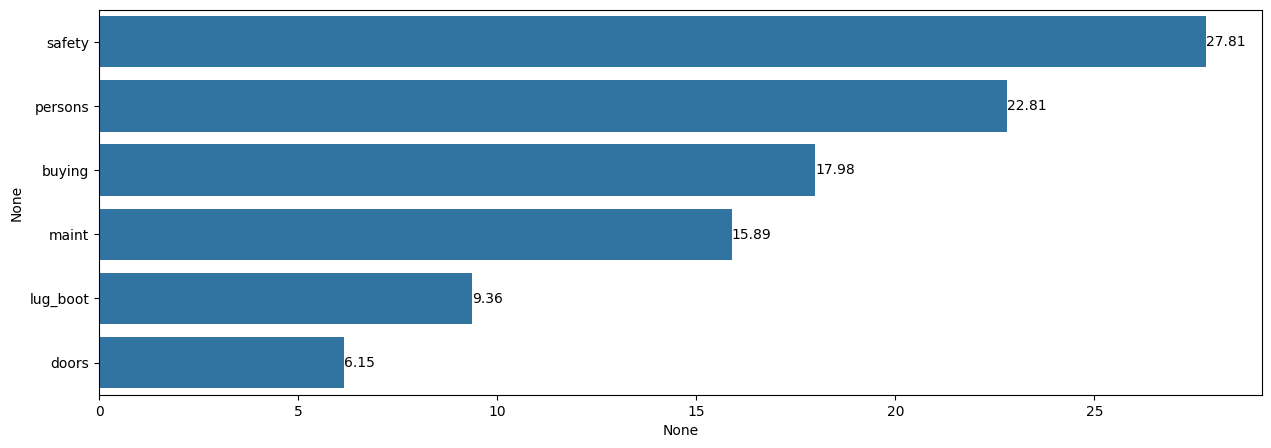

In [75]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)
ax.bar_label(ax.containers[0])
plt.show()

In [80]:
# Comparing the models
models = pd.DataFrame({
    'Model' : ['Decision Tree', 'AdaBoost', 'Random Forest'],
    'Training Scores': [dt_train_score, ab_train_score, rf_train_score],
    'Testing Scores': [dt_test_score, ab_test_score, rf_test_score]})

models

,Model,Training Scores,Testing Scores
0,Decision Tree,97.18,95.38
1,AdaBoost,84.59,85.26
2,Random Forest,100.00,98.27
